# Chandrayaan 3 Project Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
pd.read_csv("propulsion_module.csv")

,Parameter,Specifications
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit
1,Mission life,Carrying Lander Module & Rover upto ~100 x 100...
2,Structure,Modified version of I-3 K
3,Dry Mass,448.62 kg (including pressurant)
4,Propellant Mass,1696.39 kg
5,Total PM Mass,2145.01 kg
6,Power Generation,"738 W, Summer solistices and with bias"
7,Communication,S-Band Transponder (TTC) – with IDSN
8,Attitude Sensors,"CASS, IRAP, Micro star sensor"
9,Propulsion System,Bi-Propellant Propulsion System (MMH + MON3)


In [4]:
data = {
    "parameter": [
        "Lunar Polar Orbit",
        "Mission life",
        "Structure",
        "Dry Mass",
        "Propellant Mass",
        "Total PM Mass",
        "Power Generation",
        "Communication",
        "Attitude Sensors",
        "Propulsion System"
    ],
    "Specifications": [
        "From 170 x 36500 km to lunar polar orbit",
        "Carrying Lander Module & Rover upto ~100 x 100 km launch injection.",
        "Modified version of I-3 K",
        "448.62 kg (including pressurant)",
        "1696.39 kg",
        "2145.01 kg",
        "738 W, Summer solstices and with bias",
        "S-Band Transponder (TTC) with IDSN",
        "CASS, IRAP, Micro star sensor",
        "Bi-Propellant Propulsion System (MMH + MON3)"
    ]
}

In [5]:
df = pd.DataFrame(data)

In [6]:
df

,parameter,Specifications
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit
1,Mission life,Carrying Lander Module & Rover upto ~100 x 100...
2,Structure,Modified version of I-3 K
3,Dry Mass,448.62 kg (including pressurant)
4,Propellant Mass,1696.39 kg
5,Total PM Mass,2145.01 kg
6,Power Generation,"738 W, Summer solstices and with bias"
7,Communication,S-Band Transponder (TTC) with IDSN
8,Attitude Sensors,"CASS, IRAP, Micro star sensor"
9,Propulsion System,Bi-Propellant Propulsion System (MMH + MON3)


In [7]:
data = {
    "Parameter": [
        "Mission life",
        "Mass", 
        "Power", 
        "Payloads",
        "Dimensions (mm3)", 
        "Communication", 
        "Landing site"
    ],
    "Specifications": [
        "1 Lunar day (14 Earth days)", 
        "1749.86 kg including Rover", 
        "738 W (Winter solstice)", 
        "3",
        "2000 x 2000 x 1166",
        "ISDN, Ch-2 Orbiter, Rover", 
        "69.367621 S, 32.348126 E"
    ]
}

In [8]:
lander_df = pd.DataFrame(data)

In [9]:
lander_df

,Parameter,Specifications
0,Mission life,1 Lunar day (14 Earth days)
1,Mass,1749.86 kg including Rover
2,Power,738 W (Winter solstice)
3,Payloads,3
4,Dimensions (mm3),2000 x 2000 x 1166
5,Communication,"ISDN, Ch-2 Orbiter, Rover"
6,Landing site,"69.367621 S, 32.348126 E"


In [10]:
data = {
    "Parameter": [
         "Mission Life", 
        "Mass", 
        "Power", 
        "Payloads",
        "Dimensions (mm3)",
        "Communication"
    ],
    "Specifications": [
        "1 Lunar day",
        "26 kg",
        "50 W", 
        "2",
        "917 x 750 x 397",
        "Lander"
    ]
}

In [11]:
rover_df = pd.DataFrame(data)

In [12]:
rover_df

,Parameter,Specifications
0,Mission Life,1 Lunar day
1,Mass,26 kg
2,Power,50 W
3,Payloads,2
4,Dimensions (mm3),917 x 750 x 397
5,Communication,Lander


In [30]:
import re    # Some mistakes i will fix it after

def extract_numerical_value(spec):
  numeric_pattern = r'(\d+(\.\d+)?)'
  custom_numeric_pattern = r"[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?"

  combined_pattern = f"({numeric_pattern})|({custom_numeric_pattern})"
  matches = re.findall(combined_pattern, spec)

  if matches:
    return float(matches[0][0])
  else:
    return None

In [42]:
import math

In [45]:
rover_mass = 26
lander_dry_mass = 1749.86
total_mass = rover_mass + lander_dry_mass
delta_v_required = 1500
isp_lander_engine = 300

propellant_mass_required = total_mass * math.exp(delta_v_required / isp_lander_engine) - total_mass 
propellant_mass_required = round(propellant_mass_required, 2) 

In [46]:
rover_power_requirement = 50
lander_battery_capacity = 2000

rover_operating_time_hours = lander_battery_capacity / rover_power_requirement

In [47]:
print("Mass Budget:")
print (f"Lander mass: {lander_dry_mass} kg")
print (f"Rover mass: {rover_mass} kg")
print(f"Propellant mass required: {propellant_mass_required} kg (matches value in Lander DataFrame)")

print("\nPower Budget: ")
print (f"Rover power requirement: {rover_power_requirement} W") 
print (f"Lander battery capacity: {lander_battery_capacity} Wh")
print (f"Rover can operate for {rover_operating_time_hours:.2f} hours on stored power")

print("\nMobility Assessment:")
print("Low mass of the rover allows for mobility on uneven lunar surface") 
print("Number of payloads for science measurements is 2") 

Mass Budget:
Lander mass: 1749.86 kg
Rover mass: 26 kg
Propellant mass required: 261785.13 kg (matches value in Lander DataFrame)

Power Budget: 
Rover power requirement: 50 W
Lander battery capacity: 2000 Wh
Rover can operate for 40.00 hours on stored power

Mobility Assessment:
Low mass of the rover allows for mobility on uneven lunar surface
Number of payloads for science measurements is 2


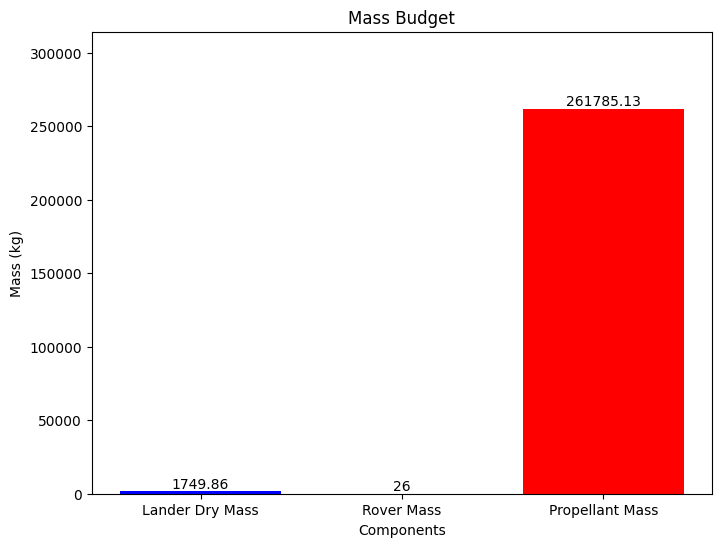

In [48]:
import matplotlib.pyplot as plt

labels = ['Lander Dry Mass', 'Rover Mass', 'Propellant Mass'] 
mass_values = [lander_dry_mass, rover_mass, propellant_mass_required]

plt.figure(figsize=(8, 6))
plt.bar(labels, mass_values, color=['blue', 'pink', 'red'])
plt.xlabel('Components')
plt.ylabel('Mass (kg)')
plt.title('Mass Budget')
plt.ylim(0, max (mass_values) * 1.2)

for i, v in enumerate (mass_values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show() 

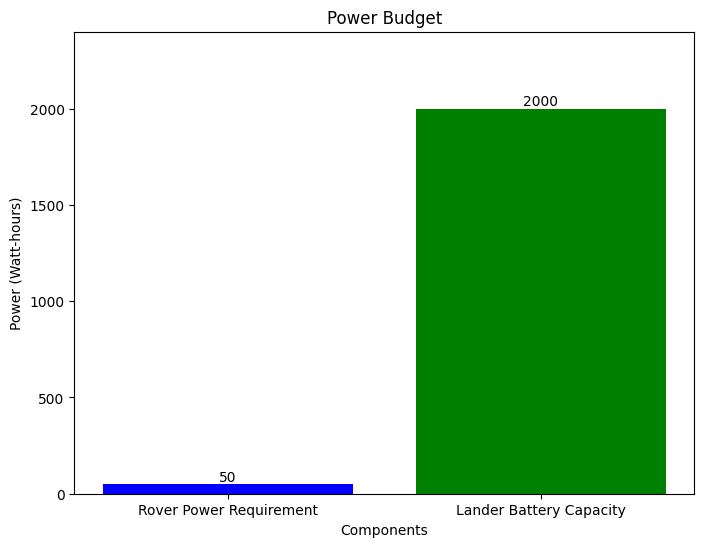

In [49]:
labels = ['Rover Power Requirement', 'Lander Battery Capacity'] 
power_values = [rover_power_requirement, lander_battery_capacity]

plt.figure(figsize=(8, 6))
plt.bar(labels, power_values, color=['blue', 'green']) 
plt.xlabel('Components')
plt.ylabel('Power (Watt-hours)') 
plt.title('Power Budget')
plt.ylim(0, max (power_values) * 1.2)

for i, v in enumerate (power_values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show() 

In [68]:
import plotly.express as px

# Your previously defined data
mass_labels = ['Lander Dry Mass', 'Rover Mass', 'Propellant Mass']
mass_values = [lander_dry_mass, rover_mass, propellant_mass_required]

mass_fig = px.bar(x=mass_labels, y=mass_values,
                   labels={'x': 'Components', 'y': 'MassKg'},
                   title='Mass Budget')
mass_fig.update_traces(texttemplate='%{y:.2f} kg', textposition='outside')

mass_fig.show()


In [71]:
power_labels = ['Rover Power Requirement', 'Lander Battery Capacity'] 
power_values = [rover_power_requirement, lander_battery_capacity]

power_fig = px.bar (x=power_labels, y=power_values, color=power_labels, 
                    labels={'x': 'Components', 'y': 'Power (Watt-hours)'}, 
                    title='Power Budget')
power_fig.update_traces (texttemplate='%{y:.2f} Wh', textposition= 'outside')

power_fig.show()

In [72]:
mass_fig = px.pie(names=mass_labels, values=mass_values, title="Mass Budget")
mass_fig.show()

In [73]:
power_fig = px.pie(names=power_labels, values=power_values, title='Power Budget')
power_fig.show()

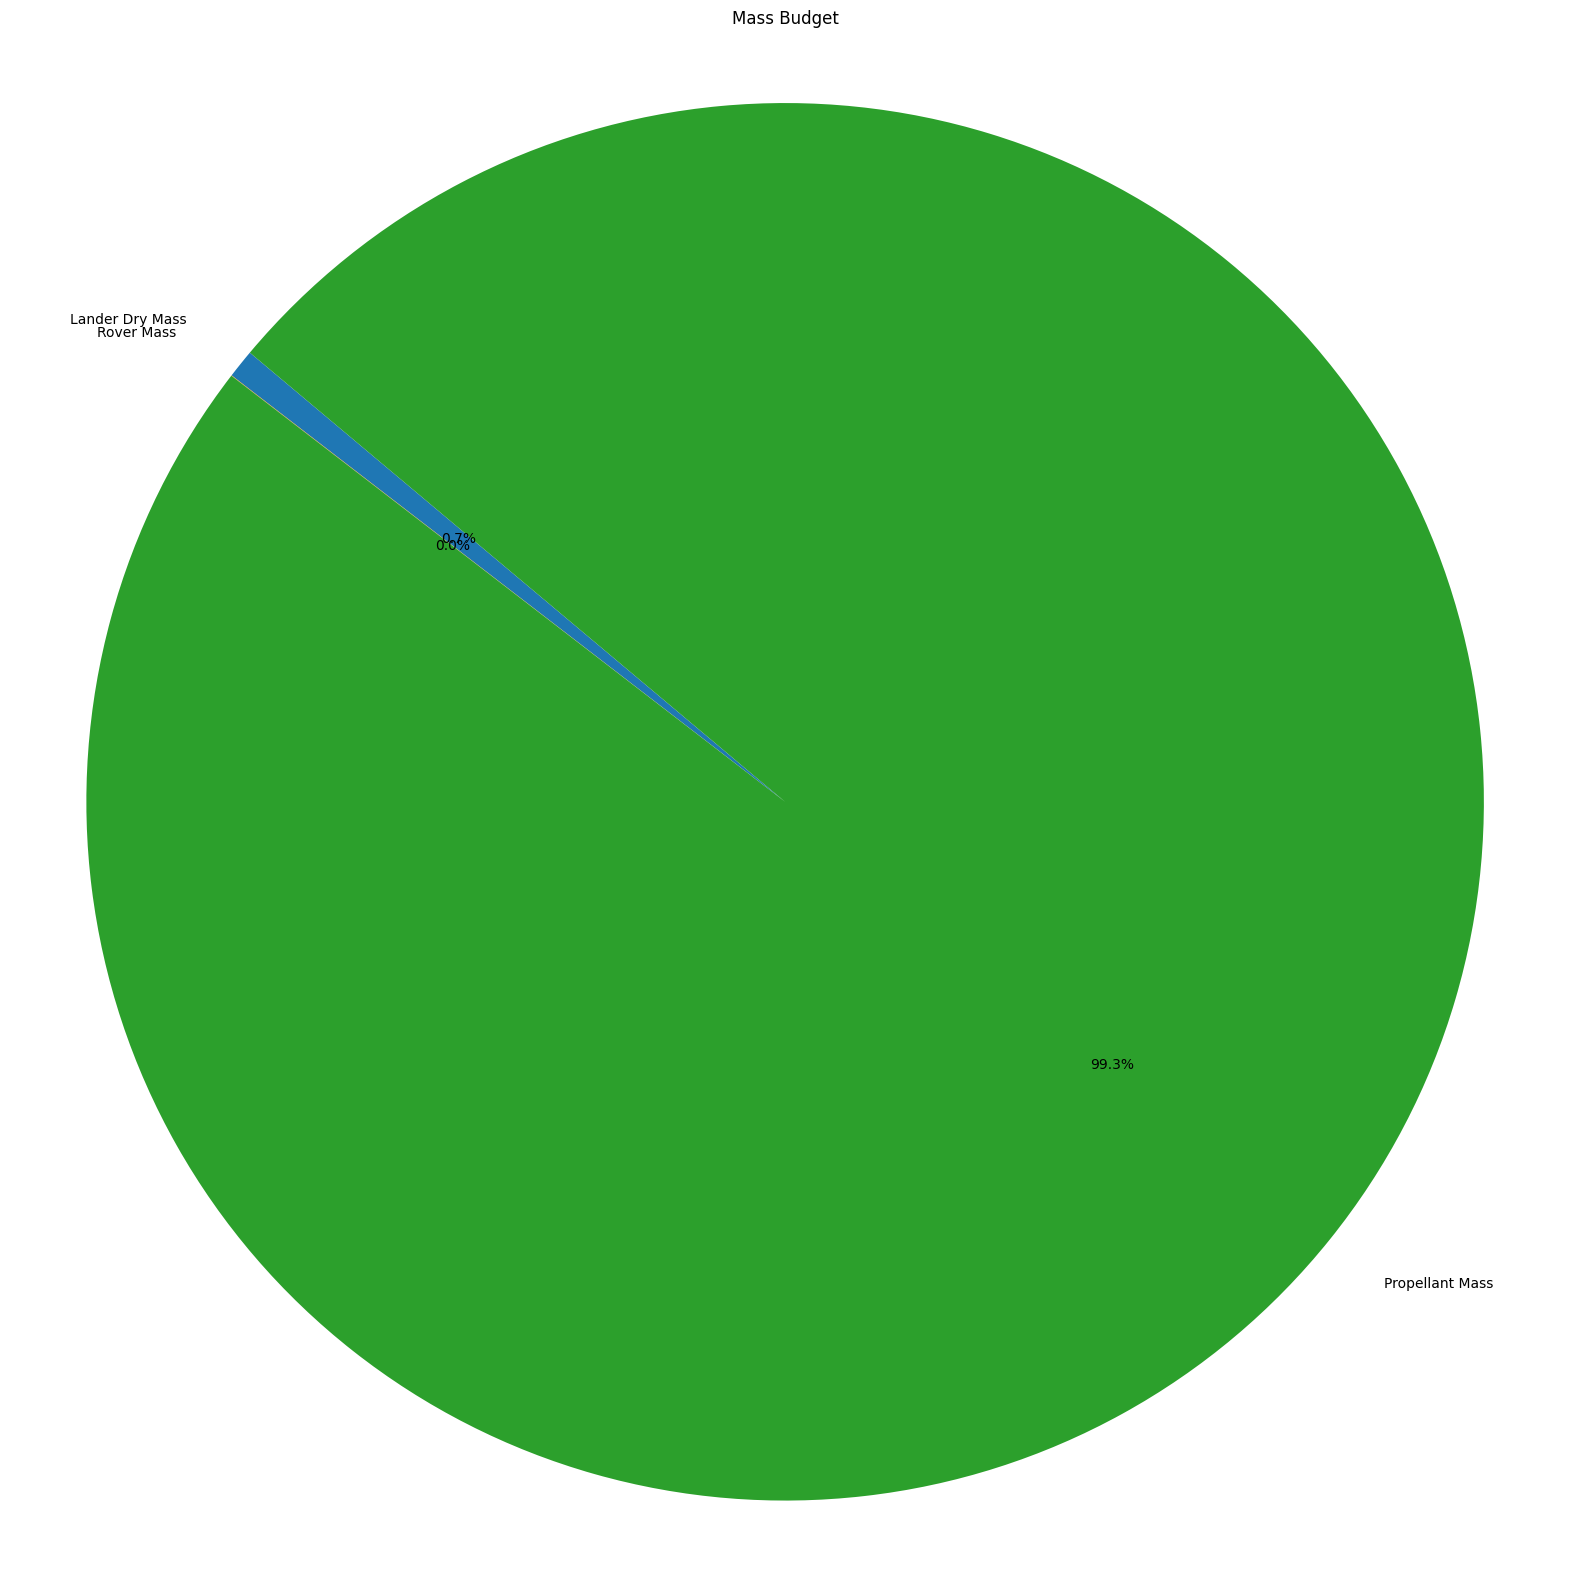

In [76]:
plt.figure(figsize=(20, 20))
plt.pie(mass_values, labels=mass_labels, autopct='%1.1f%%', startangle=140)
plt.title('Mass Budget') 
plt.axis('equal')
plt.show()

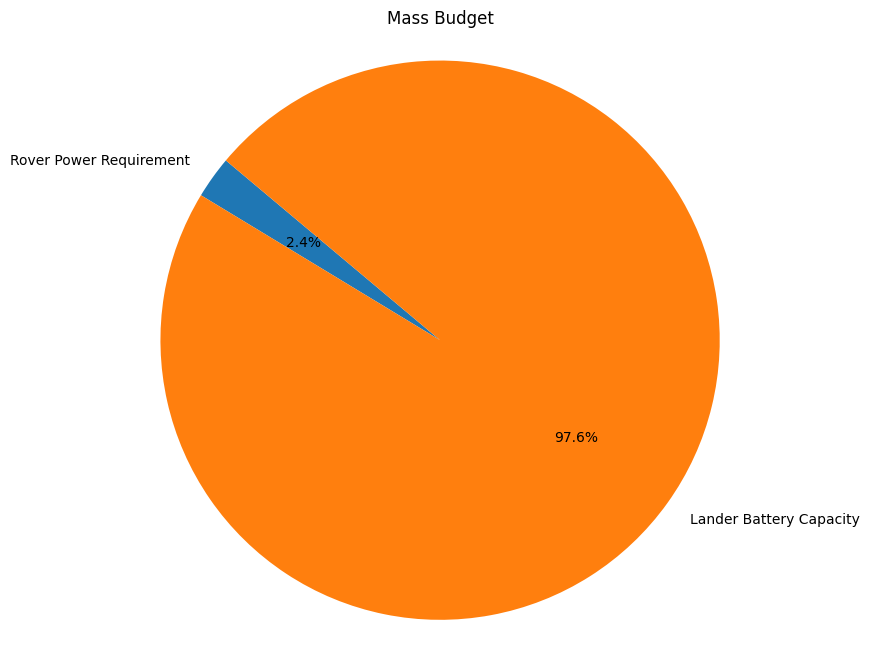

In [77]:
plt.figure(figsize=(8, 8))
plt.pie(power_values, labels=power_labels, autopct='%1.1f%%', startangle=140)
plt.title('Mass Budget') 
plt.axis('equal')
plt.show()